In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\M.Gopal\\labeled_data.csv")

In [3]:
data.describe()

,index,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [4]:
data.isnull().sum()
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
data.isnull().sum()

index                 0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
data.shape

(24783, 7)

In [7]:
data.columns

Index(['index', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [8]:
data.nunique()

index                 24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [9]:
data["labels"]=data["class"].map({0:"Hate speech",1:"Offencive Language",2:"No hate and Offensive"})

In [10]:
print(data["labels"])

0        No hate and Offensive
1           Offencive Language
2           Offencive Language
3           Offencive Language
4           Offencive Language
                 ...          
24778       Offencive Language
24779    No hate and Offensive
24780       Offencive Language
24781       Offencive Language
24782    No hate and Offensive
Name: labels, Length: 24783, dtype: object


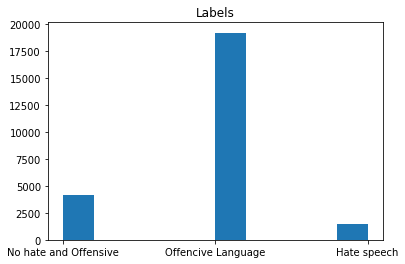

In [11]:
plt.hist(data["labels"],bins=10)
plt.title("Labels")
plt.show()

In [12]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offencive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offencive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offencive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offencive Language


In [13]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["tweet"]:
    count = count+1
print(count)
average_length = total_length_characters /count
print(average_length)

0        140
1         85
2        120
3         62
4        137
        ... 
24778    146
24779     70
24780     67
24781     37
24782    127
Name: total_length_characters, Length: 24783, dtype: int64
2117334
24783
85.43493523786466


In [14]:
import string
import re
import nltk
import pandas as pd
import numpy as np
from nltk.util import pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Gopal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\}]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['tweet']=data['tweet'].apply(clean)
print(data['tweet'])

0         rt mayasolov woman shouldnt complain clean ho...
1         rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2         rt urkindofbrand dawg rt  ever fuck bitch sta...
3                   rt cganderson vivabas look like tranni
4         rt shenikarobert shit hear might true might f...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object


In [16]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print(total_length_characters)
count = 0
for y in data["tweet"]:
    count = count+1
print(count)
average_length = total_length_characters /count
print(average_length)

0        73
1        51
2        64
3        39
4        65
         ..
24778    68
24779    52
24780    52
24781    30
24782    80
Name: total_length_characters, Length: 24783, dtype: int64
1212303
24783
48.91671710446677


In [17]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
vectorizer.get_feature_names_out()
print(X.shape)

(24783, 25693)


In [19]:
first_vector = X[0]
dataframe = pd.DataFrame(first_vector.T.todense(),index =vectorizer.get_feature_names(),columns = ["tfidf"])
dataframe.sort_values(by = ["tfidf"],ascending = False)

,tfidf
mayasolov,0.477508
shouldnt,0.351964
complain,0.333887
clean,0.329161
woman,0.297411
...,...
goe,0.000000
godzilla,0.000000
godthat,0.000000
godsmackmus,0.000000


In [20]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.33,random_state=42)

In [21]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
print("Training accuracy:",clf.score(X_train,y_train))
print("Testing accuracy:",clf.score(X_test,y_test))

Training accuracy: 0.9996386412912551
Testing accuracy: 0.8723560337449566


In [23]:
text1 = "You are a good person!"
data = vectorizer.transform([text1]).toarray()
print(clf.predict(data))

['No hate and Offensive']


In [24]:
text2 = "You are fat bitch"
data = vectorizer.transform([text2]).toarray()
print(clf.predict(data))

['Offencive Language']


In [25]:
from sklearn.svm import SVC

In [26]:
classifier=SVC()
classifier.fit(X_train,y_train)

SVC()

In [27]:
y_pred=classifier.predict(X_test)

In [28]:
print("Training accuracy:",classifier.score(X_train,y_train))
print("Testing accuracy:",classifier.score(X_test,y_test))

Training accuracy: 0.9719344736208143
Testing accuracy: 0.8939968211272772


In [29]:
t1 = "You are awesome"
data = vectorizer.transform([t1]).toarray()
print(classifier.predict(data))

['No hate and Offensive']


In [30]:
t2 = "You are bad I don't like you"
data = vectorizer.transform([t2]).toarray()
print(classifier.predict(data))

['Offencive Language']
